In [14]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [15]:
dataset = pd.read_csv('Dataset (2015 onwards).csv')
dataset.head()

,Date,Year,Mean_Temperature (K),Mean Temperature (C),Extras,Count
0,1/1/15,2015,289.598,16.448,NaN,1
1,1/2/15,2015,291.769,18.619,NaN,2
2,1/3/15,2015,291.775,18.625,NaN,3
3,1/4/15,2015,291.240,18.090,NaN,4
4,1/5/15,2015,289.311,16.161,NaN,5


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1826 non-null   object 
 1   Year                  1826 non-null   int64  
 2   Mean_Temperature (K)  1826 non-null   float64
 3   Mean Temperature (C)  1826 non-null   float64
 4   Extras                789 non-null    float64
 5   Count                 1826 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [17]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(dataset["Date"])
train_dataset['y']=dataset['Mean Temperature (C)']
train_dataset.head(2)

,ds,y
0,2015-01-01,16.448
1,2015-01-02,18.619


In [18]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future= prophet_basic.make_future_dataframe(periods=2196)
print(future)

             ds
0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
...         ...
4017 2025-12-31
4018 2026-01-01
4019 2026-01-02
4020 2026-01-03
4021 2026-01-04

[4022 rows x 1 columns]


In [33]:
forecast=prophet_basic.predict(future)

Text(84.25, 0.5, 'Mean Temperature in °C')

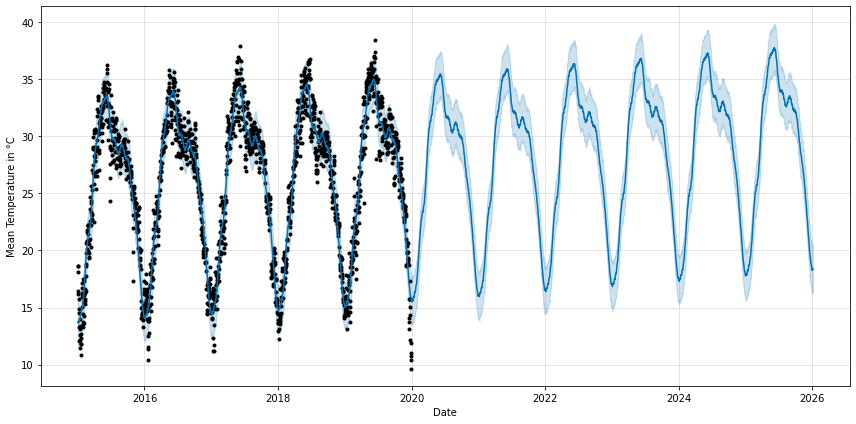

In [34]:
fig1 =prophet_basic.plot(forecast, figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Mean Temperature in °C')

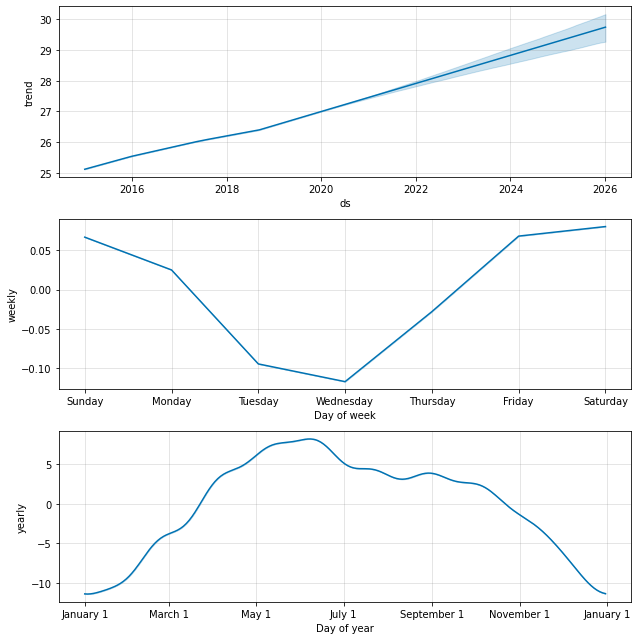

In [35]:
fig1 = prophet_basic.plot_components(forecast)

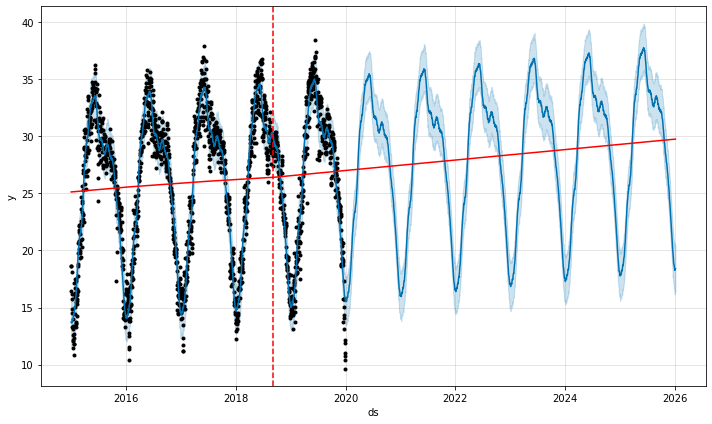

In [36]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [37]:
prophet_basic.changepoints

58     2015-02-28
117    2015-04-28
175    2015-06-25
233    2015-08-22
292    2015-10-20
350    2015-12-17
409    2016-02-14
467    2016-04-12
525    2016-06-09
584    2016-08-07
642    2016-10-04
700    2016-12-01
759    2017-01-29
817    2017-03-28
875    2017-05-25
934    2017-07-23
992    2017-09-19
1050   2017-11-16
1109   2018-01-14
1167   2018-03-13
1226   2018-05-11
1284   2018-07-08
1342   2018-09-04
1401   2018-11-02
1459   2018-12-30
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


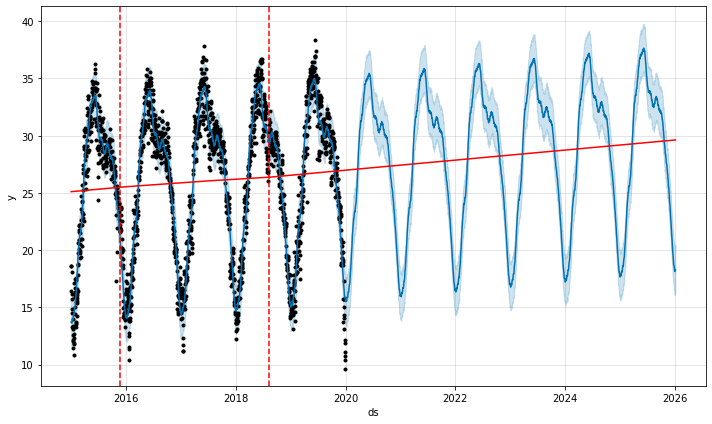

In [38]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


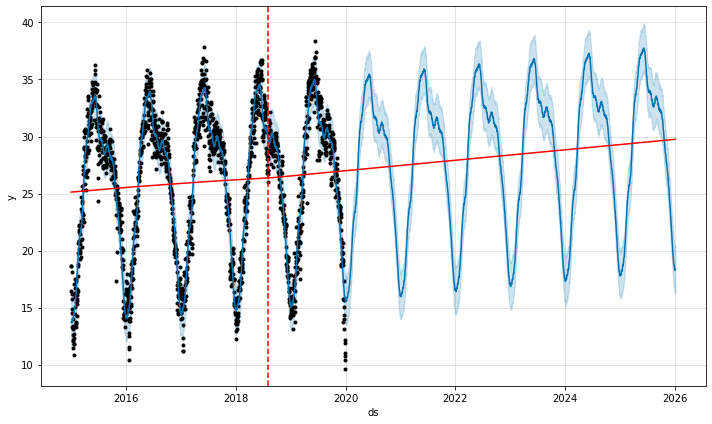

In [39]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


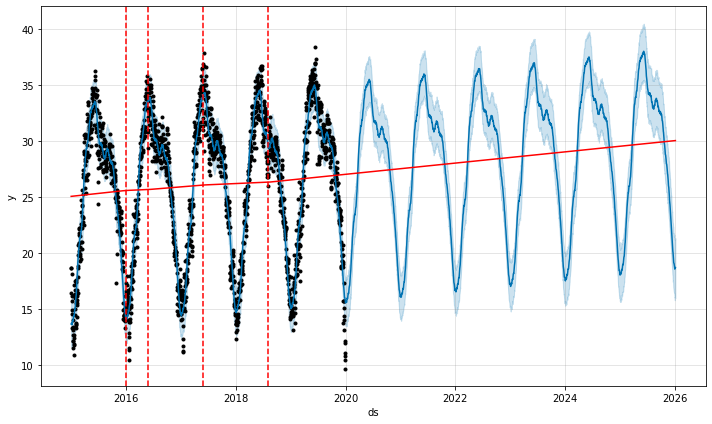

In [40]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [41]:
print(forecast)

             ds      trend  ...  multiplicative_terms_upper       yhat
0    2015-01-01  25.056173  ...                         0.0  13.634903
1    2015-01-02  25.057654  ...                         0.0  13.712855
2    2015-01-03  25.059136  ...                         0.0  13.718292
3    2015-01-04  25.060617  ...                         0.0  13.708621
4    2015-01-05  25.062098  ...                         0.0  13.680321
...         ...        ...  ...                         ...        ...
4017 2025-12-31  30.038414  ...                         0.0  18.550419
4018 2026-01-01  30.039788  ...                         0.0  18.612572
4019 2026-01-02  30.041162  ...                         0.0  18.693307
4020 2026-01-03  30.042537  ...                         0.0  18.701333
4021 2026-01-04  30.043911  ...                         0.0  18.694032

[4022 rows x 19 columns]


In [42]:
res = pd.DataFrame(forecast)
res.to_csv("prediction_results.csv")